In [45]:
import pandas as pd
import pickle
from utility_functions import cross_validate_and_save_model, vectorize, evaluate
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from transformers import pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

# Split data
into training and test sets

In [2]:
df = pd.read_csv(f'../data/6 - Classification data/full_classification_df.csv')
df.head()

,Type,QuoteWordCount,QuoteLen,StartDate,Speaker,QuoteText,NonStopwordsQuoteText,Tag
0,Committee,114.0,690.0,2022-01-17 12:00:00,"<< יור >> היו""ר אפרת רייטן מרום: << יור >>",בשיחות שקיימתי עם האוצר ובשיחות שקיימתי אם יוש...,בשיחות שקיימתי האוצר ובשיחות שקיימתי יושב-ראש ...,כלכלי
1,Committee,114.0,690.0,2022-01-17 12:00:00,"<< יור >> היו""ר אפרת רייטן מרום: << יור >>",בשיחות שקיימתי עם האוצר ובשיחות שקיימתי אם יוש...,בשיחות שקיימתי האוצר ובשיחות שקיימתי יושב-ראש ...,כלכלי
2,Committee,110.0,625.0,2021-03-03 14:00:00,<< דובר >> מיכל וונש (כחול לבן): << דובר >>,"כן בהקשר הנכון, אדוני היושב-ראש, כיוון שהביקור...",בהקשר הנכון היושב-ראש כיוון שהביקורת הסגירה הס...,קורונה
3,Committee,133.0,696.0,2017-02-21 11:00:00,"היו""ר דוד אמסלם:","אני אומר בגדול, בסך הכול יש לנו אתרים מקודשים ...",בגדול בסך הכול אתרים מקודשים לעם היהודי לעם הי...,בלי
4,Committee,113.0,577.0,2017-02-20 10:30:00,"היו""ר קארין אלהרר:","תראו, אנחנו עוסקים היום בנושא כאוב ועצוב. הוא ...",תראו עוסקים כאוב ועצוב כאוב ועצוב פעמיים רשלנו...,בריאות


In [3]:
X = df['QuoteText']
y = df['Tag']
names = ["X_train", "X_test", "y_train", "y_test"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, data in enumerate([X_train, X_test, y_train, y_test]):
    data.reset_index(drop=True, inplace=True)
    data.to_csv(f'../data/6 - Classification data/{names[name]}.csv', index=0)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

print("Tags distribution:\n")
print("train tags\n", y_train.value_counts(), "\n")
print("test tags\n", y_test.value_counts())

Tags distribution:

train tags
 בלי           877
חינוך         186
רווחה         171
קורונה        159
כלכלי         151
בריאות        140
נשים          131
בטחון פנים     81
בטחון          70
Name: Tag, dtype: int64 

test tags
 בלי           207
קורונה         53
כלכלי          44
נשים           39
חינוך          34
רווחה          34
בטחון          31
בריאות         28
בטחון פנים     22
Name: Tag, dtype: int64


## Vectorize data

In [4]:
X_train_counts, X_test_counts = vectorize(X_train, X_test,"simple_counts")
X_train_tfidf, X_test_tfidf = vectorize(X_train, X_test,"tfidf")

simple counts: 1966 quotes, 71214 words in train set
TFIDF: 1966 quotes, 71214 words in train set


# Classificaiton models
## Logistic Regression
#### Logistic Regression with simple counts

In [5]:
logistic_simple_model, logistic_simple_predicted = cross_validate_and_save_model(LogisticRegression(), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_simple_counts')

cross validation scores (5fold) for logistic_simple_counts:
accuracy: 0.611398716110616
precision_macro: 0.7559394508489514
recall_macro: 0.3742360634602524
f1_macro: 0.43879938331622076


In [39]:
logistic_c2_simple_model, logistic_c2_simple_predicted = cross_validate_and_save_model(LogisticRegression(C=2), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_c2_simple_counts')

cross validation scores (5fold) for logistic_c2_simple_counts:
accuracy: 0.6149584737990985
precision_macro: 0.7494833816122964
recall_macro: 0.3817624156296654
f1_macro: 0.4482168736122663


In [40]:
logistic_c05_simple_model, logistic_c05_simple_predicted = cross_validate_and_save_model(LogisticRegression(C=0.5), X_train_counts, y_train, X_test_counts, kf, scoring, 'logistic_c05_simple_counts')

cross validation scores (5fold) for logistic_c05_simple_counts:
accuracy: 0.6088541868485295
precision_macro: 0.7750694572063469
recall_macro: 0.3674879946203281
f1_macro: 0.43133888135140347


#### Logistic Regression with TFIDF

In [6]:
logistic_tfidf_model, logistic_tfidf_predicted = cross_validate_and_save_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'logistic_tfidf_counts')

cross validation scores (5fold) for logistic_tfidf_counts:
accuracy: 0.544261892768112
precision_macro: 0.5382129180052666
recall_macro: 0.264202719044651
f1_macro: 0.28878742398478807


In [41]:
logistic_c05_tfidf_model, logistic_c05_tfidf_predicted = cross_validate_and_save_model(LogisticRegression(C=0.5), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'logistic_c05_tfidf_counts')

cross validation scores (5fold) for logistic_c05_tfidf_counts:
accuracy: 0.5259516151948438
precision_macro: 0.439545426395207
recall_macro: 0.2357316116220758
f1_macro: 0.25371918281906913


## Random Forest
#### Random forest with simple counts

In [12]:
forest_30_100_simple_model, forest_30_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=30, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_30_100_simple_counts')

cross validation scores (5fold) for forest_30_100_simple_counts:
accuracy: 0.5651166996034668
precision_macro: 0.6107720239328622
recall_macro: 0.30669521964410074
f1_macro: 0.3468256009401638


In [15]:
forest_100_100_simple_model, forest_100_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_100_simple_counts')

cross validation scores (5fold) for forest_100_100_simple_counts:
accuracy: 0.5722387982588704
precision_macro: 0.6172725736347415
recall_macro: 0.3108827514162195
f1_macro: 0.34691847944917564


In [16]:
forest_200_100_simple_model, forest_200_100_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=200, max_depth=100), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_200_100_simple_counts')

cross validation scores (5fold) for forest_200_100_simple_counts:
accuracy: 0.5768163676521875
precision_macro: 0.6155416201786117
recall_macro: 0.3181969113561066
f1_macro: 0.35514829707213597


In [17]:
forest_100_200_simple_model, forest_100_200_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=200), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_200_simple_counts')

cross validation scores (5fold) for forest_100_200_simple_counts:
accuracy: 0.5946190310122577
precision_macro: 0.6715056430935321
recall_macro: 0.35051266397964814
f1_macro: 0.3978925139388991


In [19]:
forest_100_1000_simple_model, forest_100_1000_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=1000), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_100_1000_simple_counts')

cross validation scores (5fold) for forest_100_41000_simple_counts:
accuracy: 0.6032652639464745
precision_macro: 0.7407365305336644
recall_macro: 0.3639030023413562
f1_macro: 0.42093825933293283


In [22]:
forest_150_1000_simple_model, forest_150_1000_simple_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=150, max_depth=1000), X_train_counts, y_train, X_test_counts, kf, scoring, 'forest_150_1000_simple_counts')

cross validation scores (5fold) for forest_150_1000_simple_counts:
accuracy: 0.6012283488975859
precision_macro: 0.7091156970012837
recall_macro: 0.36148693813768595
f1_macro: 0.4153181942387102


#### Random forest with TFIDF

In [26]:
forest_100_200_tfidf_model, forest_100_200_tfidf_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=200), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'forest_100_200_tfidf_counts')

cross validation scores (5fold) for forest_100_200_tfidf_counts:
accuracy: 0.5920732101109517
precision_macro: 0.7097734692838452
recall_macro: 0.3477482033071365
f1_macro: 0.3980349973233138


In [24]:
forest_100_1000_tfidf_model, forest_100_1000_tfidf_predicted = cross_validate_and_save_model(RandomForestClassifier(n_estimators=100, max_depth=1000), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'forest_100_1000_tfidf_counts')

cross validation scores (5fold) for forest_100_1000_tfidf_counts:
accuracy: 0.5890223582748867
precision_macro: 0.7163447611593137
recall_macro: 0.3441546828846268
f1_macro: 0.3943235060145914


## SVM
#### SVM with simple counts

In [32]:
svm_simple_model, svm_simple_predicted = cross_validate_and_save_model(svm.SVC(), X_train_counts, y_train, X_test_counts, kf, scoring, 'svm_simple_counts')

cross validation scores (5fold) for svm_simple_counts:
accuracy: 0.538157605817543
precision_macro: 0.5623370354172578
recall_macro: 0.2586496552200782
f1_macro: 0.28451280669087053


#### SVM with TFIDF

In [33]:
svm_tfidf_model, svm_tfidf_predicted = cross_validate_and_save_model(svm.SVC(), X_train_tfidf, y_train, X_test_tfidf, kf, scoring, 'svm_tfidf_counts')

cross validation scores (5fold) for svm_tfidf_counts:
accuracy: 0.5401867710311156
precision_macro: 0.6186664765064028
recall_macro: 0.2633250700341497
f1_macro: 0.29308442400727036


# Evaluation

In [123]:
def evaluate(title,true_labels,predicted_labels):
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(title)
        prec_mic=precision_score(true_labels, predicted_labels, average="micro")
        rec_mic=recall_score(true_labels, predicted_labels, average="micro")
        f1_mic=f1_score(true_labels, predicted_labels, average="micro")
        print(f"Micro:\nprecision: {prec_mic}\nrecall: {rec_mic}\nf1: {f1_mic}\n")

        prec_mac=precision_score(true_labels, predicted_labels, average="macro")
        rec_mac=recall_score(true_labels, predicted_labels,average="macro")
        f1_mac=f1_score(true_labels, predicted_labels, average="macro")
        print(f"Macro:\nprecision: {prec_mac}\nrecall: {rec_mac}\nf1: {f1_mac}\n")


        acc=accuracy_score(true_labels, predicted_labels)
        print(f"Accuracy: {acc}\n")

        cm=confusion_matrix(true_labels, predicted_labels)
        labels = [label[::-1] for label in ['קורונה','נשים','בלי','בריאות','כלכלי','בטחון פנים','חינוך','רווחה','בטחון']]
        cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
        print("Confusion Matrix:")
        cmd.plot(xticks_rotation=90, cmap="YlGn")

## Logistic regression

-------Logistic Regression simple counts, C=1) Evaluation-------
Micro:
precision: 0.6138211382113821
recall: 0.6138211382113821
f1: 0.6138211382113821

Macro:
precision: 0.7594988881220766
recall: 0.41996589459267936
f1: 0.4843553821990256

Accuracy: 0.6138211382113821

Confusion Matrix:


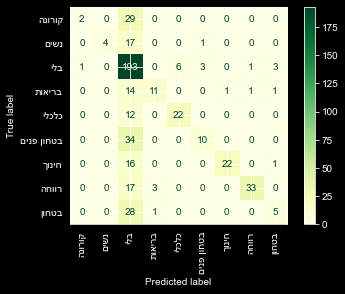

In [125]:
evaluate("-------Logistic Regression simple counts, C=1) Evaluation-------",y_test,logistic_simple_predicted)

-------Logistic Regression simple counts, C=2) Evaluation-------
Micro:
precision: 0.6158536585365854
recall: 0.6158536585365854
f1: 0.6158536585365854

Macro:
precision: 0.7604538333588613
recall: 0.4232338684488885
f1: 0.48774860942684956

Accuracy: 0.6158536585365854

Confusion Matrix:


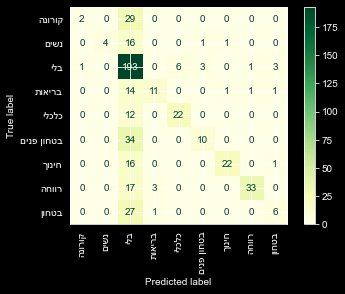

In [126]:
evaluate("-------Logistic Regression simple counts, C=2) Evaluation-------",y_test,logistic_c2_simple_predicted)

-------Logistic Regression simple counts, C=0.5) Evaluation-------
Micro:
precision: 0.6138211382113821
recall: 0.6138211382113821
f1: 0.6138211382113821

Macro:
precision: 0.7778102359996344
recall: 0.41272095299138645
f1: 0.4765551282016633

Accuracy: 0.6138211382113821

Confusion Matrix:


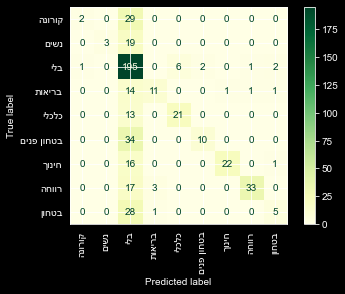

In [127]:
evaluate("-------Logistic Regression simple counts, C=0.5) Evaluation-------",y_test,logistic_c05_simple_predicted)

-------Logistic Regression TFIDF counts, C=1) Evaluation-------
Micro:
precision: 0.5691056910569106
recall: 0.5691056910569106
f1: 0.5691056910569106

Macro:
precision: 0.5237030493136815
recall: 0.35081498873742595
f1: 0.38443632245785

Accuracy: 0.5691056910569106

Confusion Matrix:


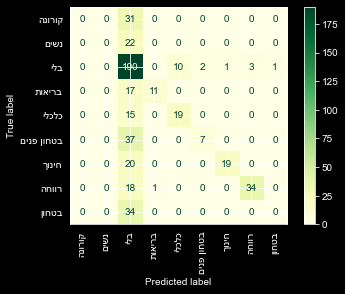

In [128]:
evaluate("-------Logistic Regression TFIDF counts, C=1) Evaluation-------",y_test,logistic_tfidf_predicted)

-------Logistic Regression TFIDF counts, C=0.5) Evaluation-------
Micro:
precision: 0.5528455284552846
recall: 0.5528455284552846
f1: 0.5528455284552846

Macro:
precision: 0.5399462897345535
recall: 0.3128848211928203
f1: 0.3394422763533442

Accuracy: 0.5528455284552846

Confusion Matrix:


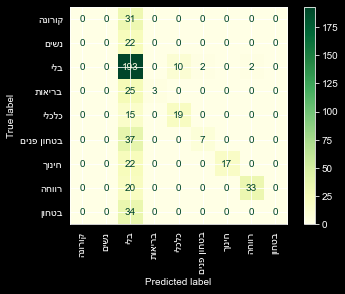

In [129]:
evaluate("-------Logistic Regression TFIDF counts, C=0.5) Evaluation-------",y_test,logistic_c05_tfidf_predicted)

## Random forest

-----Random forest with simple counts, 100 trees, max depth 200) Evaluation-----
Micro:
precision: 0.5873983739837398
recall: 0.5873983739837398
f1: 0.5873983739837398

Macro:
precision: 0.6813064354435513
recall: 0.38111272396848805
f1: 0.4300435230954156

Accuracy: 0.5873983739837398

Confusion Matrix:


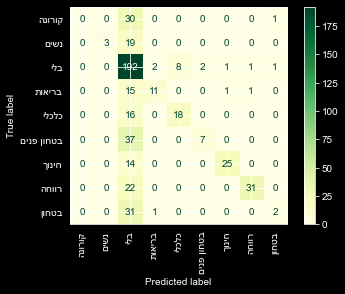

In [132]:
evaluate("-----Random forest with simple counts, 100 trees, max depth 200) Evaluation-----",y_test,forest_100_200_simple_predicted)

-----Random forest with simple counts, 100 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.5873983739837398
recall: 0.5873983739837398
f1: 0.5873983739837398

Macro:
precision: 0.6625196190569753
recall: 0.3783815187649896
f1: 0.4242948718657437

Accuracy: 0.5873983739837398

Confusion Matrix:


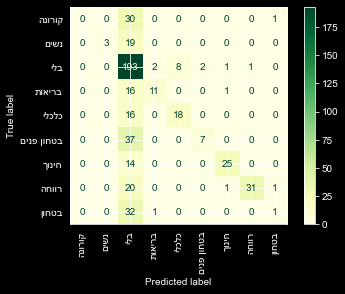

In [133]:
evaluate("-----Random forest with simple counts, 100 trees, max depth 1000) Evaluation-----",y_test,forest_100_1000_simple_predicted)

-----Random forest with simple counts, 150 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.5914634146341463
recall: 0.5914634146341463
f1: 0.5914634146341463

Macro:
precision: 0.7972410628291242
recall: 0.38387016182479017
f1: 0.4329894570022857

Accuracy: 0.5914634146341463

Confusion Matrix:


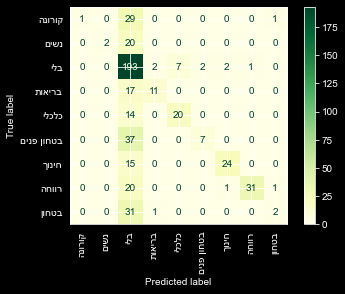

In [134]:
evaluate("-----Random forest with simple counts, 150 trees, max depth 1000) Evaluation-----",y_test,forest_150_1000_simple_predicted)

-----Random forest with TFIDF counts, 100 trees, max depth 200) Evaluation-----
Micro:
precision: 0.6016260162601627
recall: 0.6016260162601627
f1: 0.6016260162601627

Macro:
precision: 0.7986421704458234
recall: 0.39892227668549135
f1: 0.44517551293804114

Accuracy: 0.6016260162601627

Confusion Matrix:


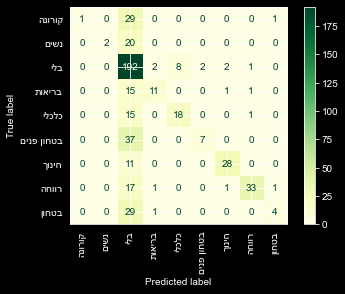

In [135]:
evaluate("-----Random forest with TFIDF counts, 100 trees, max depth 200) Evaluation-----",y_test,forest_100_200_tfidf_predicted)

-----Random forest with TFIDF counts, 100 trees, max depth 1000) Evaluation-----
Micro:
precision: 0.6016260162601627
recall: 0.6016260162601627
f1: 0.6016260162601627

Macro:
precision: 0.7711400382139593
recall: 0.39620685090953695
f1: 0.4424667516740688

Accuracy: 0.6016260162601627

Confusion Matrix:


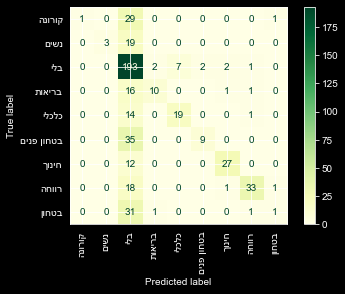

In [136]:
evaluate("-----Random forest with TFIDF counts, 100 trees, max depth 1000) Evaluation-----",y_test,forest_100_1000_tfidf_predicted)

## SVM

-----SVM with simple counts Evaluation-----
Micro:
precision: 0.5447154471544715
recall: 0.5447154471544715
f1: 0.5447154471544715

Macro:
precision: 0.6433702121308233
recall: 0.304122547169725
f1: 0.3309001531051532

Accuracy: 0.5447154471544715

Confusion Matrix:


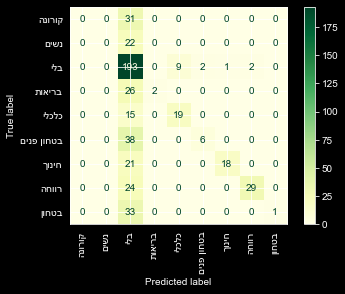

In [137]:
evaluate("-----SVM with simple counts Evaluation-----",y_test, svm_simple_predicted)

-----SVM with TFIDF counts Evaluation-----
Micro:
precision: 0.5548780487804879
recall: 0.5548780487804879
f1: 0.5548780487804879

Macro:
precision: 0.6453360267032379
recall: 0.32024756043961755
f1: 0.3505928923307953

Accuracy: 0.5548780487804879

Confusion Matrix:


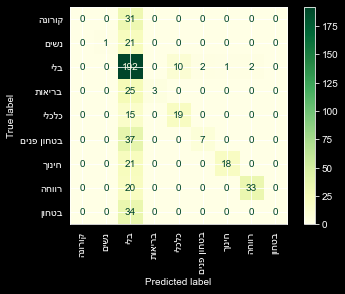

In [138]:
cm = evaluate("-----SVM with TFIDF counts Evaluation-----",y_test, svm_tfidf_predicted)
cm